## OSIC Pulmonary fibrosis Progression.⚕️

Plumonary fibrosis is a lung disease which occurs due to damage in tissue<br/>
and damage causes tissue to thicken and patient becomes short of breath.

The problem with plumonary fibrosis it can be caused by various number of<br/>
factors and it is difficult for doctors to find out what is causing the problem<br/>
and condition in which doctors can not find out the cause is called **idiopathic plumonary fibrosis.**



![image](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2016/08/10/14/57/mcdc7_pulmonaryfibrosis-8col.jpg)

### Symptoms
* Shortness of breath
* A dry cough
* Fatigue
* Unexplained Weight Loss
* Aching muscles and joints
* Widning and Rounding of tips of the fingers or toes.

To read more about plumonary fibrosis click [here](https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690)

## 1. What is the competion about ?💡

* So task here is simply to determine how much will patient's current<br/>
lung health will decline using images from CT(computerised tomography)<br/>
metadata and current health of lungs. The health or current state of lungs<br/>
can be deterimined using spirometer which is an instrument which measures how <br/>
much and how rapid a person breath. Spirometer gives a value called FVC which <br/>
stands for **Forces vital Capacity**.

* ### 1.1 what we need to predict ?
We will predict a decline in the lung function of patient in <br/> final three FVC measures and their confidence.
actually we need to make prediction for all the weeks given in the test set but only final three would be considered for evaluation.
Here you will find negative weeks in the dataset and explanation is a patient took a CT scan at week zero but he/she might have took<br/>
test for FVC before or after CT scan so week 0 is baseline but sometimes patient do not get FVC score on the same day as CT scan so there<br/>
might be no FVC score for week=0.

**Note: Let me know if any information is wrong**.

## 2.Metrics: Laplace Log Likelihood 📏

![image](https://i.imgur.com/tEIZvli.png)

* ### what is Laplace Log Likelihood ?

Here σclipped is the confidence score of the and it is clipped<br/> so value is less than or equal to 70.

and delta is abs difference in FVC precited and true which is also clipped with max value of 1000.

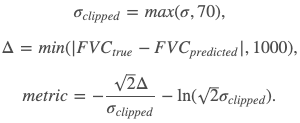

Actully I know what laplace distribution is and what log likelihood is but I did't find any article on laplace loglikelihood.<br/>
so please let me know If you find any good article on it.



### Importing Libraries 📘

In [ ]:
import os
import sys
import glob
from os import listdir
import glob
import tqdm
from typing import Dict
import cv2
import pydicom as dicom


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#plotly
# !pip install chart_studio
import plotly.express as px
# import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True,theme='pearl')

#pydicom
import pydicom

#supress warnings
import warnings
warnings.filterwarnings('ignore')


# from bokeh.layouts import row, column
# from bokeh.models import ColumnDataSource, CustomJS, Label,Range1d,Slider,Span
# from bokeh.plotting import figure, output_notebook, show

#used for changing color of text in print statement
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

# output_notebook()

### Getting data💽

In [ ]:
folder_path = '../input/osic-pulmonary-fibrosis-progression'
train_csv = folder_path + '/train.csv'
test_csv = folder_path+ '/test.csv'
sample_csv = folder_path + '/sample_submission.csv'

train_data = pd.read_csv(train_csv)
test_data = pd.read_csv(test_csv)
sample = pd.read_csv(sample_csv)

print(f"{y_}Number of rows in train data: {r_}{train_data.shape[0]}\n{y_}Number of columns in train data: {r_}{train_data.shape[1]}")
print(f"{g_}Number of rows in test data: {r_}{test_data.shape[0]}\n{g_}Number of columns in test data: {r_}{test_data.shape[1]}")
print(f"{b_}Number of rows in submission data: {r_}{sample.shape[0]}\n{b_}Number of columns in submission data:{r_}{sample.shape[1]}")

train_data.head().style.applymap(lambda x: 'background-color:lightgreen')

## 3. EDA

### 3.1 FVC Distribution📈


In [ ]:
def distribution(feature, color):
    plt.figure(dpi=100)
    sns.distplot(train_data[feature],color=color)
    print("{}Max value of {} is: {} {:.2f} \n{}Min value of {} is: {} {:.2f}\n{}Mean of {} is: {}{:.2f}\n{}Standard Deviation of {} is:{}{:.2f}"\
      .format(y_,feature,r_,train_data[feature].max(),g_,feature,r_,train_data[feature].min(),b_,feature,r_,train_data[feature].mean(),m_,feature,r_,train_data[feature].std()))

In [ ]:
distribution("FVC","blue")

### 3.2 Distribution of Age 👶🧒🧑🧓

In [ ]:
distribution("Age","brown")

### 3.3 Distribution of Percent📈

In [ ]:
distribution("Percent","blue")

### 3.4 Distribution of weeks📅

In [ ]:
distribution("Weeks","yellow")

 ### 3.5 Number of smokers  sex 🚬

In [ ]:
plt.figure(dpi=100)
sns.countplot(data=train_data,x='SmokingStatus',hue='Sex');

### 3.6 Distribution of FVC based on smoking status  and Sex

In [ ]:
def distribution2(feature):
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    for i in train_data.Sex.unique():
        sns.distplot(train_data[train_data['Sex']==i][feature],label=i)
    plt.title(f"Distribution of {feature} based on Sex")
    plt.legend()

    plt.subplot(122)
    for i in train_data.SmokingStatus.unique():
        sns.distplot(train_data[train_data['SmokingStatus']==i][feature],label=i)
    plt.title(f"Distribution of {feature}  based on Smoking Status")
    plt.legend()


In [ ]:
distribution2("FVC")

### 3.7 Distribution of Percent based on Sex and SmokingStatus

In [ ]:
distribution2("Percent")

 ### 3.8 Distribution of Age based on SmokingStatus and Sex

In [ ]:
distribution2("Age")

### 3.9 Distribution of Weeks based on SmokingStatus and Sex

In [ ]:
distribution2("Weeks")

### 3.10 FVC vs Percent 
**Note:now will make graphs in plotly just for change**

In [ ]:
def vs(feature1,feature2,color=None):
    fig = px.scatter(train_data,x=feature1,y=feature2,color=color)
    fig.show()

In [ ]:
vs("FVC","Percent",'SmokingStatus')

### 3.11 FVC vs Age

In [ ]:
vs("FVC","Age",'SmokingStatus')

### 3.12 FVC vs Weeks

In [ ]:
vs("FVC","Weeks","SmokingStatus")


### 3.13 FVC vs weeks of 20 random patient 🎲

In [ ]:
rn = np.random.randint(0,train_data.Patient.nunique()-20,1)[0]
patients_ids = train_data.Patient.unique()[rn:rn+20]
fig =go.Figure()

for patient in patients_ids:
    df = train_data[train_data["Patient"] == patient]
    fig.add_trace(go.Scatter(x=df.Weeks,y=df.FVC,
                            mode='lines',
                            name=str(patient)))
fig.show()

### 3.14 count of weeks of each patient ⌛

In [ ]:
print(f"{y_}Number of unique patient is {r_}{train_data.Patient.nunique()}")

df = train_data.Patient.value_counts()
fig = px.bar(x=[f"Patient {i}" for i in range(len(df.index))],y=df.values)
fig.show()

### 3.15 Box plot of FVC bases on sex and smokingstatus 👀

In [ ]:
def box(feature1,feature2,color=None):
    fig = px.box(train_data,x=feature2,y=feature1,color=color)
    fig.show()

In [ ]:
box("FVC","Sex","SmokingStatus")

### 3.16 Box plot of Percent based on sex and smoking status

In [ ]:
box("Percent","Sex","SmokingStatus")

### 3.16 Box plot of Age based on sex and smoking status

In [ ]:
box("Age","Sex","SmokingStatus")

### 3.17 Correlation matrix of train data 

In [ ]:
plt.figure(dpi=100)
sns.heatmap(train_data.corr(),annot=True);

## 4. Visulizing Images 🖼️

* What is DICOM image ?
**DICOM(Digital Image and Communication in Medecine)** is a standard developed and maintained by  **National Electrical Manufacturers Association (NEMA)** for storing and transfering the medical images like CT(computerised Tomography), Magnetic resonanse image(MRI) and other types of medical images.

DICOM is very good protocol and intresting to read further click [here](https://en.wikipedia.org/wiki/DICOM)


### 4.1 Single Image

In [ ]:
train_image_path = folder_path + '/train/'
test_image_path = folder_path + '/test/'

train_images = os.listdir(train_image_path)
test_images = os.listdir(test_image_path)

image = train_image_path+train_images[0]+"/1.dcm"

def show_image(image):
    print(f"{y_} Image {r_}{image}")
    image = dicom.dcmread(image)
    image = image.pixel_array    
    plt.figure(figsize=(7,7))
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.show()

show_image(image)

    

### 4.2 Grid of sorted images of some random patient

In [ ]:
def show_grid(cmap='gray'):
    rn = np.random.randint(0,len(train_images),1)[0]
    path= train_image_path+train_images[rn]
    images = [dicom.read_file(path+"/"+img) for img in os.listdir(path)]
    images.sort(key=lambda x: float(x.ImagePositionPatient[2]))
    plt.figure(figsize=(10,10))
    for i,image in enumerate(images[:100]):
        plt.subplot(10,10,i+1)
        plt.imshow(image.pixel_array,cmap=cmap)
        plt.axis('off')
    plt.show()

show_grid()

In [ ]:
show_grid(cmap='jet')

In [ ]:
show_grid(cmap='RdYlBu')

### 4.3 Animation

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

def show_animation():
    rn = np.random.randint(0,len(train_images),1)[0]
    fig = plt.figure()
    path= train_image_path+train_images[0]
    images = [dicom.read_file(path+"/"+img) for img in os.listdir(path)]
    images.sort(key=lambda x: float(x.ImagePositionPatient[2]))
    ims = list()
    for image in images:
        image = plt.imshow(image.pixel_array,cmap='gray',animated=True)
        plt.axis('off')
        ims.append([image])
    ani = animation.ArtistAnimation(fig,ims,interval=100,blit=False,repeat_delay=1000)
    return ani

ani = show_animation()

In [ ]:
HTML(ani.to_jshtml())

## 4.4 3-D reconstruction.

This code for converting 2-D slices to a 3-D image is written by [mrbean-bremen](https://github.com/mrbean-bremen).
**Orignal Code** [here](https://github.com/pydicom/pydicom/blob/master/examples/image_processing/reslice.py).

In [ ]:
# load the DICOM files
def reconstruct():
    files = []
    path= train_image_path+train_images[0]

    for fname in os.listdir(path):
    #     print("loading: {}".format(fname))
        files.append(pydicom.dcmread(path+"/"+fname))

    print("file count: {}".format(len(files)))

    # skip files with no SliceLocation (eg scout views)
    slices = []
    skipcount = 0
    for f in files:
        if hasattr(f, 'SliceLocation'):
            slices.append(f)
        else:
            skipcount = skipcount + 1

    print("skipped, no SliceLocation: {}".format(skipcount))

    # ensure they are in the correct order
    slices = sorted(slices, key=lambda s: s.SliceLocation)

    # pixel aspects, assuming all slices are the same
    ps = slices[0].PixelSpacing
    ss = slices[0].SliceThickness
    ax_aspect = ps[1]/ps[0]
    sag_aspect = ps[1]/ss
    cor_aspect = ss/ps[0]

    # create 3D array
    img_shape = list(slices[0].pixel_array.shape)
    img_shape.append(len(slices))
    img3d = np.zeros(img_shape)

    # fill 3D array with the images from the files
    for i, s in enumerate(slices):
        img2d = s.pixel_array
        img3d[:, :, i] = img2d

    # plot 3 orthogonal slices
    plt.figure(figsize=(15,7))
    a1 = plt.subplot(1,3,1)
    plt.imshow(img3d[:, :, img_shape[2]//2])
    a1.set_aspect(ax_aspect)
    plt.axis('off')


    a2 = plt.subplot(1, 3, 2)
    plt.imshow(img3d[:, img_shape[1]//2, :])
    a2.set_aspect(sag_aspect)
    plt.axis('off')


    a3 = plt.subplot(1, 3, 3)
    plt.imshow(img3d[img_shape[0]//2, :, :].T)
    a3.set_aspect(cor_aspect)
    plt.axis('off')
    plt.show()

In [ ]:
reconstruct()

## 5. Preprocessing Data

Let us create a baseline pytorch model.

### 5.1 Importing some more libraries 📘

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate, KFold,GroupKFold
from sklearn.metrics import make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
#getting base week for patient
def get_baseline_week(data):
    df = data.copy()
    df['Weeks'] = df['Weeks'].astype(int)
    df['min_week'] = df.groupby('Patient')['Weeks'].transform('min')
    df['baseline_week'] = df['Weeks'] - df['min_week']
    return df

#getting FVC for base week and setting it as base_FVC of patient
def get_base_FVC(data):
    df = data.copy()
    base = df.loc[df.Weeks == df.min_week][['Patient','FVC']].copy()
    base.columns = ['Patient','base_FVC']
    
    base['nb']=1
    base['nb'] = base.groupby('Patient')['nb'].transform('cumsum')
    
    base = base[base.nb==1]
    base.drop('nb',axis =1,inplace=True)
    df = df.merge(base,on="Patient",how='left')
    df.drop(['min_week'], axis = 1)
    return df 

In [ ]:
train_data.drop_duplicates(keep=False,inplace=True,subset=['Patient','Weeks'])
train_data = get_baseline_week(train_data)
train_data = get_base_FVC(train_data)

sample = pd.read_csv(sample_csv)
sample.drop("FVC",axis=1,inplace=True)
sample[["Patient","Weeks"]] = sample["Patient_Week"].str.split("_",expand=True) 
sample = sample.merge(test_data.drop("Weeks",axis=1),on="Patient",how="left")

#we have to predict for all weeks 
sample["min_Weeks"] = np.nan
sample = get_baseline_week(sample)
sample = get_base_FVC(sample)

train_columns = ['baseline_week','base_FVC','Percent','Age','Sex','SmokingStatus']
train_label = ['FVC']
sub_columns = ['Patient_Week','FVC','Confidence']

train = train_data[train_columns]
test = sample[train_columns]
#Preprocessing
transformer = ColumnTransformer([('s',StandardScaler(),[0,1,2,3]),('o',OneHotEncoder(),[4,5])])
target = train_data[train_label].values
train = transformer.fit_transform(train)
test = transformer.transform(test)

In [ ]:
train_data.head()

In [ ]:
distribution("baseline_week",'green');

## 6 Simple Pytorch Model

### 6.1 importing pytorch libraries 📘

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
class Model(nn.Module):
    def __init__(self,n):
        super(Model,self).__init__()
        self.layer1 = nn.Linear(n,200)
        self.layer2 = nn.Linear(200,100)
        
        self.out1 = nn.Linear(100,3)
        self.relu3 = nn.ReLU()
        self.out2 = nn.Linear(100,3)
            
    def forward(self,xb):
        x1 =  F.leaky_relu(self.layer1(xb))
        x1 =  F.leaky_relu(self.layer2(x1))
        
        o1 = self.out1(x1)
        o2 = F.relu(self.out2(x1))
        return o1 + torch.cumsum(o2,dim=1)
        

### 6.2 Training Model

In [ ]:
def run():
    
    def score(outputs,target):
        confidence = outputs[:,2] - outputs[:,0]
        clip = torch.clamp(confidence,min=70)
        target=torch.reshape(target,outputs[:,1].shape)
        delta = torch.abs(outputs[:,1] - target)
        delta = torch.clamp(delta,max=1000)
        sqrt_2 = torch.sqrt(torch.tensor([2.])).to(device)
        metrics = (delta*sqrt_2/clip) + torch.log(clip*sqrt_2)
        return torch.mean(metrics)
    
    def qloss(outputs,target):
        qs = [0.25,0.5,0.75]
        qs = torch.tensor(qs,dtype=torch.float).to(device)
        e =  target - outputs
        e.to(device)
        v = torch.max(qs*e,(qs-1)*e)
        v = torch.sum(v,dim=1)
        return torch.mean(v)
    
    def loss_fn(outputs,target,l):
        return l * qloss(outputs,target) + (1- l) * score(outputs,target)
        
    def train_loop(train_loader,model,loss_fn,device,optimizer,lr_scheduler=None):
        model.train()
        losses = list()
        metrics = list()
        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            with torch.set_grad_enabled(True):           
                outputs = model(inputs)                 
                metric = score(outputs,labels)

                loss = loss_fn(outputs,labels,0.8)
                metrics.append(metric.cpu().detach().numpy())
                losses.append(loss.cpu().detach().numpy())

                loss.backward()

                optimizer.step()
                if lr_scheduler != None:
                    lr_scheduler.step()
            
        return losses,metrics
    
    def valid_loop(valid_loader,model,loss_fn,device):
        model.eval()
        losses = list()
        metrics = list()
        for i, (inputs, labels) in enumerate(valid_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)                 
            metric = score(outputs,labels)
            
            loss = loss_fn(outputs,labels,0.8)
            metrics.append(metric.cpu().detach().numpy())
            losses.append(loss.cpu().detach().numpy())
            
        return losses,metrics    

    NFOLDS =5
    kfold = KFold(NFOLDS,shuffle=True,random_state=42)
    
    #kfold
    for k , (train_idx,valid_idx) in enumerate(kfold.split(train)):
        batch_size = 64
        epochs = 50
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"{device} is used")
        x_train,x_valid,y_train,y_valid = train[train_idx,:],train[valid_idx,:],target[train_idx],target[valid_idx]
        n = x_train.shape[1]
        model = Model(n)
        model.to(device)
        lr = 0.1
        optimizer = optim.Adam(model.parameters(),lr=lr)
        lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

        train_tensor = torch.tensor(x_train,dtype=torch.float)
        y_train_tensor = torch.tensor(y_train,dtype=torch.float)

        train_ds = TensorDataset(train_tensor,y_train_tensor)
        train_dl = DataLoader(train_ds,
                             batch_size = batch_size,
                             num_workers=4,
                             shuffle=True
                             )

        valid_tensor = torch.tensor(x_valid,dtype=torch.float)
        y_valid_tensor = torch.tensor(y_valid,dtype=torch.float)

        valid_ds = TensorDataset(valid_tensor,y_valid_tensor)
        valid_dl = DataLoader(valid_ds,
                             batch_size = batch_size,
                             num_workers=4,
                             shuffle=False
                             )
        
        print(f"Fold {k}")
        for i in range(epochs):
            losses,metrics = train_loop(train_dl,model,loss_fn,device,optimizer,lr_scheduler)
            valid_losses,valid_metrics = valid_loop(valid_dl,model,loss_fn,device)
            if (i+1)%5==0:
                print(f"epoch:{i} Training | loss:{np.mean(losses)} score: {np.mean(metrics)}| \n Validation | loss:{np.mean(valid_losses)} score:{np.mean(valid_metrics)}|")
        torch.save(model.state_dict(),f'model{k}.bin')
    

In [ ]:
run()

### 6.3 Inference

In [ ]:
def inference():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    nfold = 5
    all_prediction = np.zeros((test.shape[0],3))
    
    for i in range(nfold):
        n = train.shape[1]
        
        model = Model(n)
        model.load_state_dict(torch.load(f"model{i}.bin"))
        predictions = list()
        model.to(device)
        test_tensor = torch.tensor(test,dtype=torch.float)
        test_dl = DataLoader(test_tensor,
                        batch_size=64,
                        num_workers=2,
                        shuffle=False)
    
        with torch.no_grad():
            for i, inputs in enumerate(test_dl):
                inputs = inputs.to(device, dtype=torch.float)
                outputs= model(inputs) 
                predictions.extend(outputs.cpu().detach().numpy())

        all_prediction += np.array(predictions)/nfold
        
    return all_prediction  

### 6.4 submission

In [ ]:
prediction = inference()
sample["Confidence"] = np.abs(prediction[:,2] - prediction[:,0])
sample["FVC"] = prediction[:,1]
sub = sample[sub_columns]

In [ ]:
sub.to_csv("submission.csv",index=False)

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(sub.Confidence)
plt.subplot(122)
sns.distplot(sub.FVC);

In [ ]:
print(sub.shape)
sub.head()

In [ ]:
sub.to_csv("submission.csv",index=False)

 Please tell me in the comments if anything is wrong or if you did not understand something.🤗<br/>
 Please upvote if you found it useful.

## Todo 

* How to use image to make prediction.